In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(500)

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
  
Corpus = pd.read_csv("/content/drive/MyDrive/Uottawa /data science/books_data_50.csv")
print(Corpus)

      Unnamed: 0 Author                                               Text
0              0      a  surprised, nor must you doubt my friendship, i...
1              1      a  large, firm, white and comely. But the hand wh...
2              2      a  occupied entire; and at the door of this, whic...
3              3      a  guilty of that crime upon so pitiful a provoca...
4              4      a  awaiting my arrival; he had received by the sa...
...          ...    ...                                                ...
1495        1495      e  only with the wide assortment of materials use...
1496        1496      e  way for hundreds of miles across the trackless...
1497        1497      e  Fails.—It is hard to realize the extent of the...
1498        1498      e  as effectively hidden and secure from all the ...
1499        1499      e  late in April, or in May, there might have bee...

[1500 rows x 3 columns]


In [5]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
Corpus.head(5)

,Author,Text
0,a,"surprised, nor must you doubt my friendship, i..."
1,a,"large, firm, white and comely. But the hand wh..."
2,a,"occupied entire; and at the door of this, whic..."
3,a,guilty of that crime upon so pitiful a provoca...
4,a,awaiting my arrival; he had received by the sa...


In [8]:
from google.colab import data_table
data_table.DataTable(Corpus, include_index=False, num_rows_per_page=1)

,Author,Text
0,a,"surprised, nor must you doubt my friendship, i..."
1,a,"large, firm, white and comely. But the hand wh..."
2,a,"occupied entire; and at the door of this, whic..."
3,a,guilty of that crime upon so pitiful a provoca...
4,a,awaiting my arrival; he had received by the sa...
...,...,...
1495,e,only with the wide assortment of materials use...
1496,e,way for hundreds of miles across the trackless...
1497,e,Fails.—It is hard to realize the extent of the...
1498,e,as effectively hidden and secure from all the ...


In [9]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = Corpus['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [10]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not in stopwords.words('english')]

In [11]:
X = Corpus['Text']

In [12]:
print(X)

0       surprised, nor must you doubt my friendship, i...
1       large, firm, white and comely. But the hand wh...
2       occupied entire; and at the door of this, whic...
3       guilty of that crime upon so pitiful a provoca...
4       awaiting my arrival; he had received by the sa...
                              ...                        
1495    only with the wide assortment of materials use...
1496    way for hundreds of miles across the trackless...
1497    Fails.—It is hard to realize the extent of the...
1498    as effectively hidden and secure from all the ...
1499    late in April, or in May, there might have bee...
Name: Text, Length: 1500, dtype: object


surprised, nor must you doubt my friendship, if my door is often shut even to you. You must suffer me to go my own dark way. I have brought on myself a punishment and a danger that I cannot name. If I am the chief of sinners, I am the
a


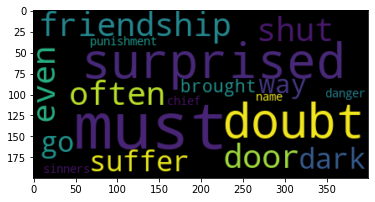

large, firm, white and comely. But the hand which I now saw, clearly enough, in the yellow light of a mid-London morning, lying half shut on the bedclothes, was lean, corded, knuckly, of a dusky pallor and thickly shaded with a swart growth of hair. It was the hand of
a


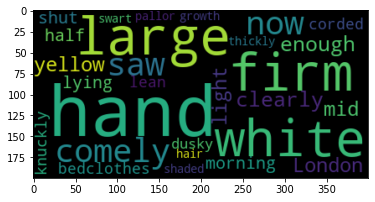

guilty of that crime upon so pitiful a provocation; and that I struck in no more reasonable spirit than that in which a sick child may break a plaything. But I had voluntarily stripped myself of all those balancing instincts by which even the worst of us continues to walk
a


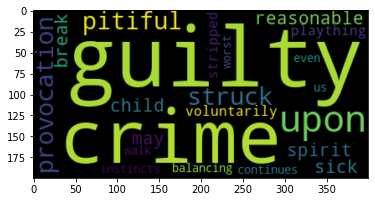

In [13]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = Corpus['Text']
wordcloud1 = WordCloud().generate(X[0])
wordcloud2 = WordCloud().generate(X[1]) 
wordcloud3 = WordCloud().generate(X[3]) 
print(X[0])
print(Corpus['Author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(Corpus['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(Corpus['Author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [14]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
# transforming into Bag-of-Words
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [15]:
# SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(text_bow_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(text_bow_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score:",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score: 84.0


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_SVM))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.73      0.86      0.79        66
           2       0.96      0.93      0.95        59
           3       0.74      0.86      0.80        57
           4       1.00      0.74      0.85        57

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.84       300
weighted avg       0.86      0.84      0.84       300



Normalized confusion matrix
[[0.80327869 0.18032787 0.         0.01639344 0.        ]
 [0.03030303 0.86363636 0.03030303 0.07575758 0.        ]
 [0.         0.01694915 0.93220339 0.05084746 0.        ]
 [0.05263158 0.0877193  0.         0.85964912 0.        ]
 [0.05263158 0.07017544 0.         0.14035088 0.73684211]]


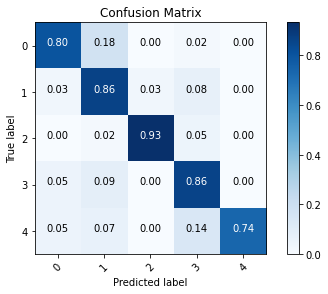

In [17]:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,predictions_SVM)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')

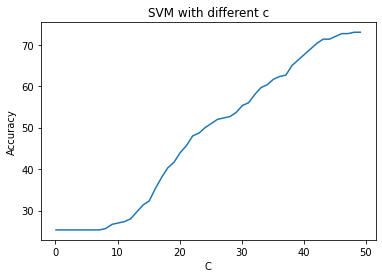

In [18]:
x=[]
y=[]
for i in np.arange(0.1,50,1):
  x.append(i)
  SVM = svm.SVC(C=i, kernel='sigmoid', degree=3, gamma='auto')
  SVM.fit(text_bow_train,y_train)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(text_bow_test)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_SVM, y_test)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM with different c") 
plt.show()

In [19]:
y

[25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.333333333333336,
 25.666666666666664,
 26.666666666666668,
 27.0,
 27.333333333333332,
 28.000000000000004,
 29.666666666666668,
 31.333333333333336,
 32.33333333333333,
 35.333333333333336,
 38.0,
 40.33333333333333,
 41.66666666666667,
 44.0,
 45.666666666666664,
 48.0,
 48.66666666666667,
 50.0,
 51.0,
 52.0,
 52.33333333333333,
 52.666666666666664,
 53.666666666666664,
 55.333333333333336,
 56.00000000000001,
 57.99999999999999,
 59.66666666666667,
 60.333333333333336,
 61.66666666666667,
 62.33333333333333,
 62.66666666666667,
 65.0,
 66.33333333333333,
 67.66666666666666,
 69.0,
 70.33333333333334,
 71.33333333333334,
 71.33333333333334,
 72.0,
 72.66666666666667,
 72.66666666666667,
 73.0,
 73.0]

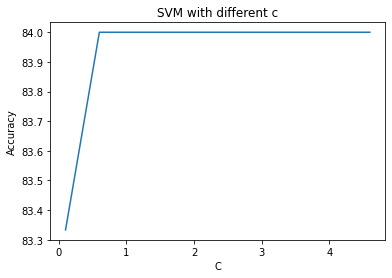

In [20]:
x=[]
y=[]
for i in np.arange(0.1,5.0,0.5):
  x.append(i)
  SVM = svm.SVC(C=i, kernel='linear', degree=3, gamma='auto')
  SVM.fit(text_bow_train,y_train)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(text_bow_test)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_SVM, y_test)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM with different c") 
plt.show()

In [21]:
y

[83.33333333333334, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0]

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
cv_scores = cross_val_score(SVM,text_bow_train,y_train,cv=kf)

In [23]:
cv_scores

array([0.90833333, 0.84166667, 0.85833333, 0.88333333, 0.875     ,
       0.85      , 0.88333333, 0.875     , 0.90833333, 0.83333333])

In [24]:
cv_scores.mean()

0.8716666666666667